In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [214]:
train_data =pd.read_csv('train.csv')

### Data exploration

In [176]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [177]:
print(train_data.shape)
train_data.columns

(1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [178]:
#descriptive statistics summary
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

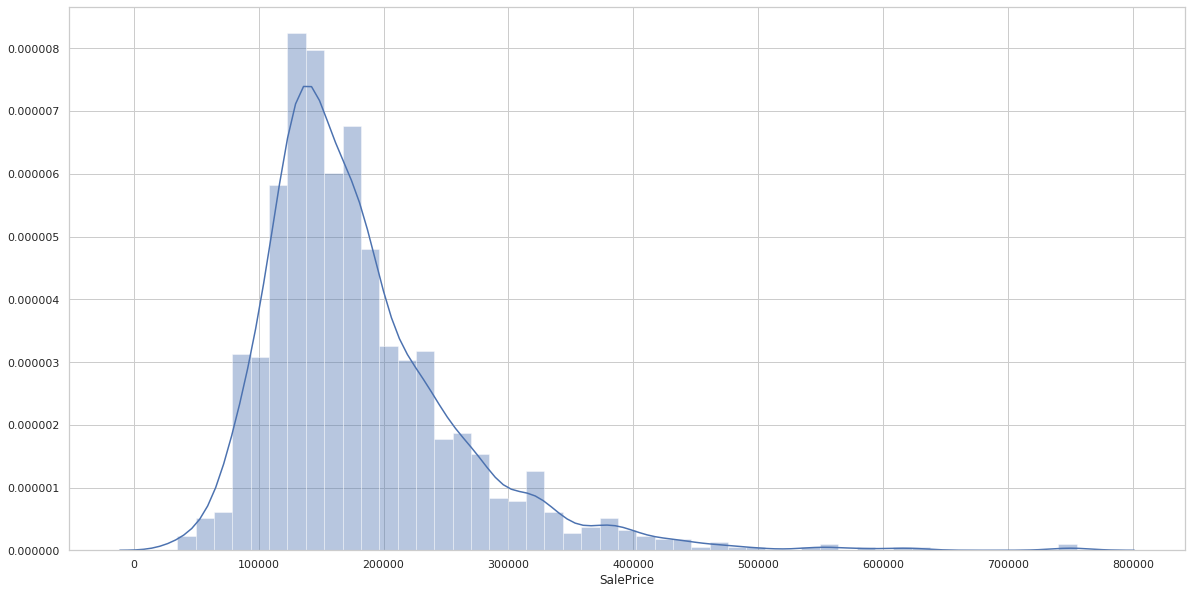

In [179]:
#histogram
sb.distplot(train_data['SalePrice']);

In [180]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


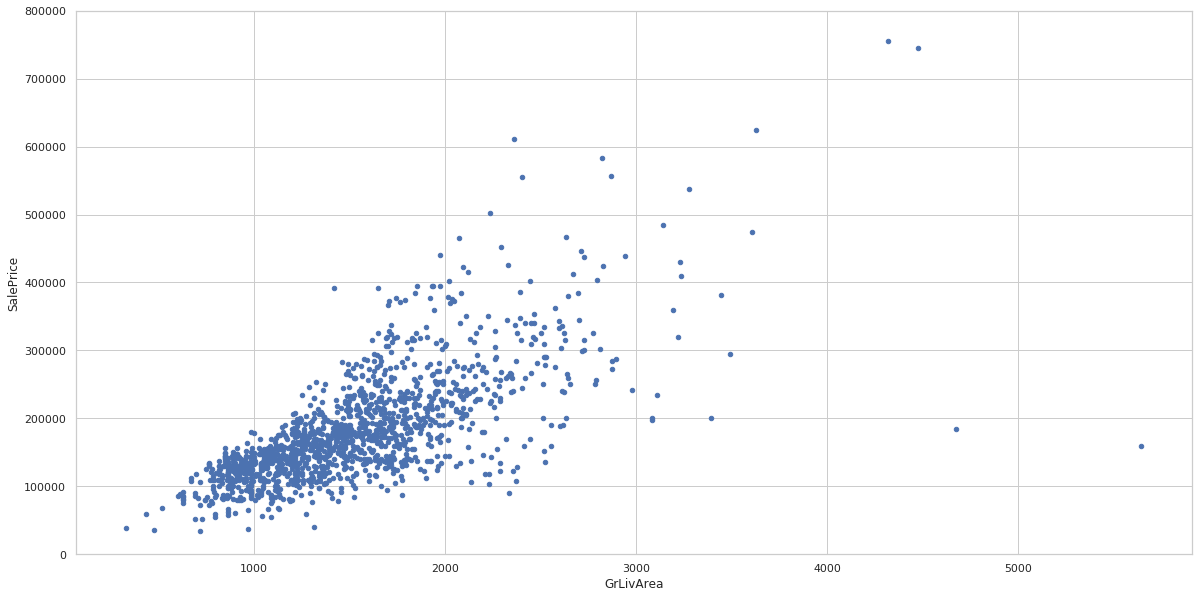

In [181]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


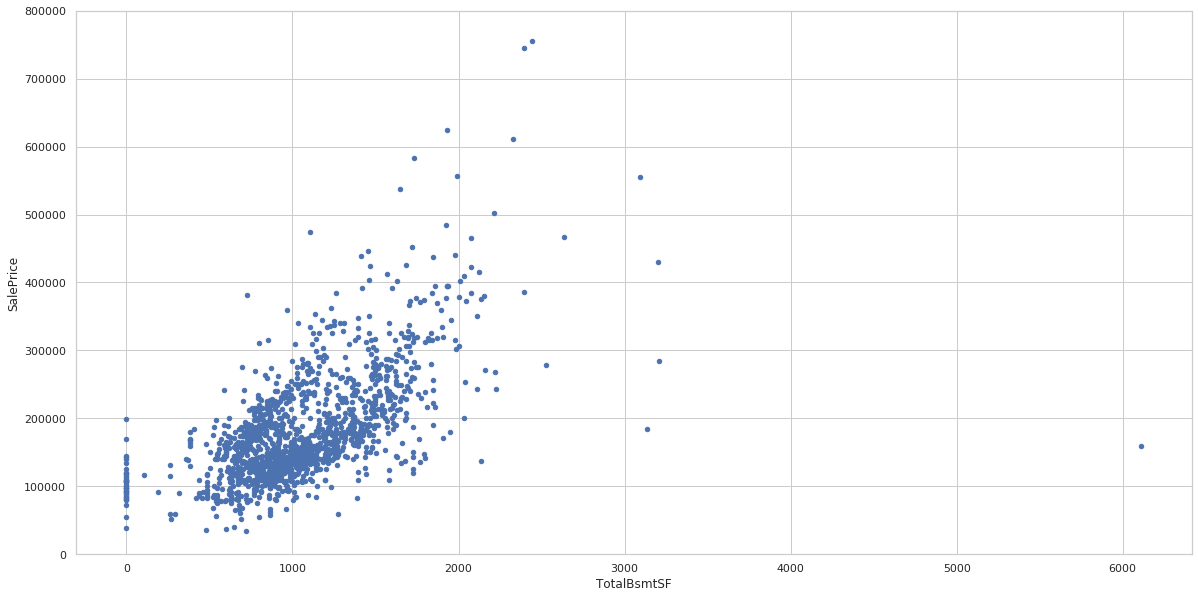

In [182]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

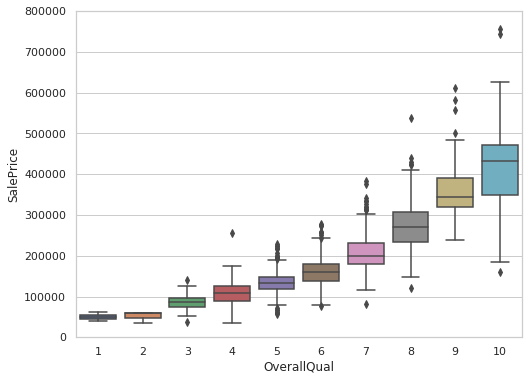

In [183]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

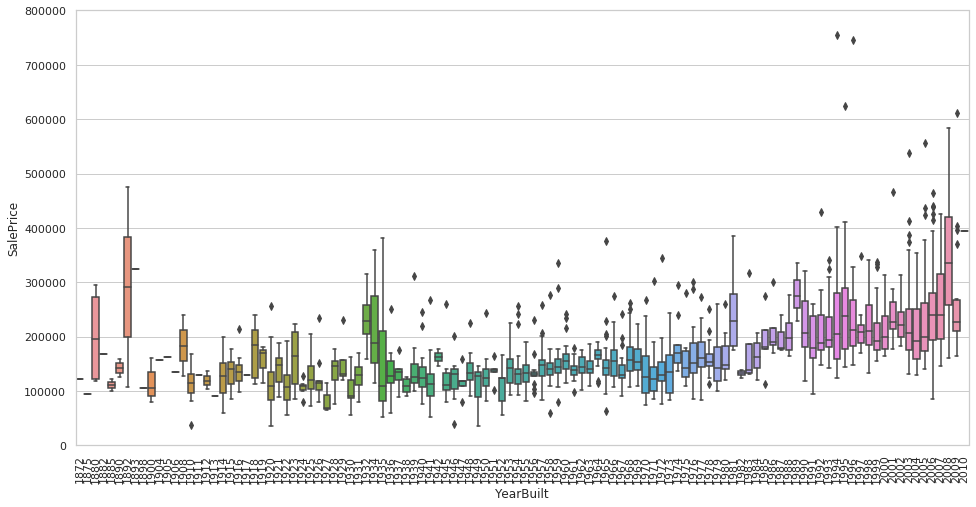

In [184]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sb.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

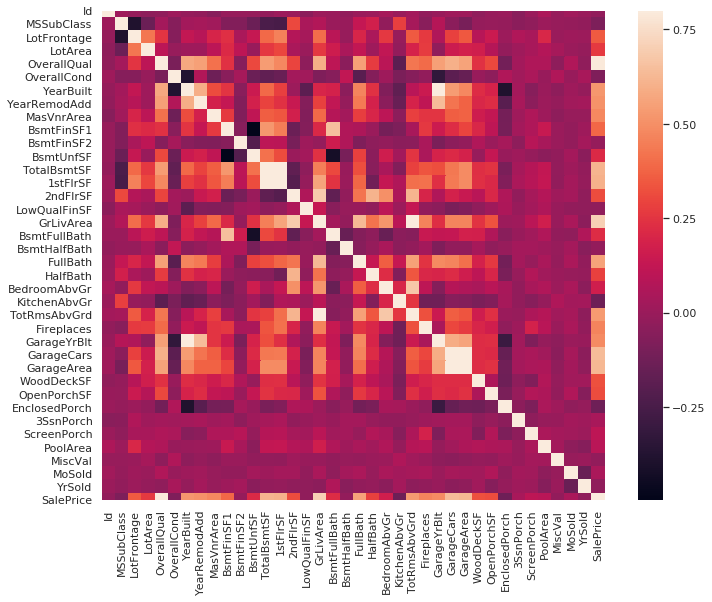

In [185]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9)) 
sb.heatmap(corrmat, vmax=.8, square=True);

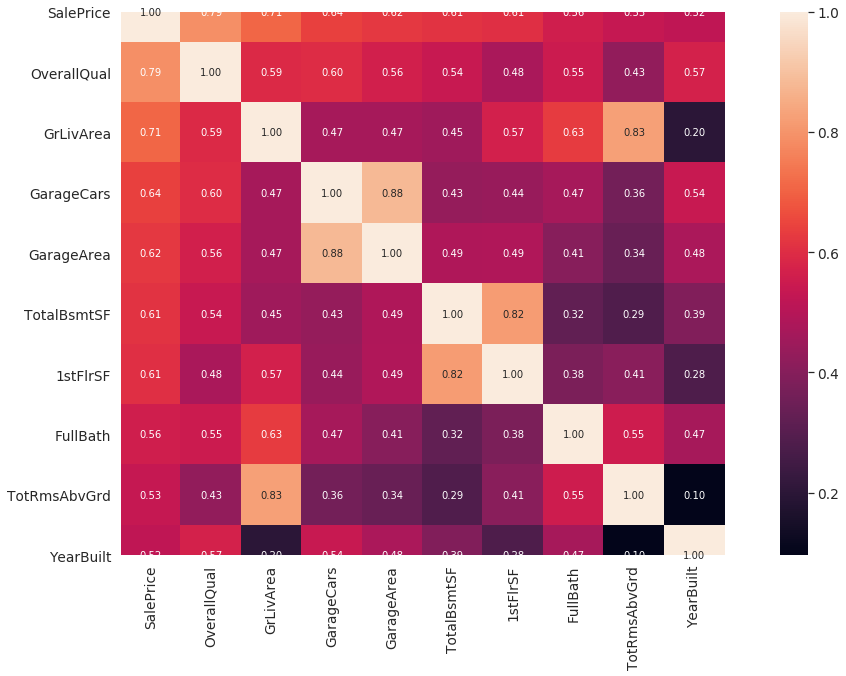

In [186]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


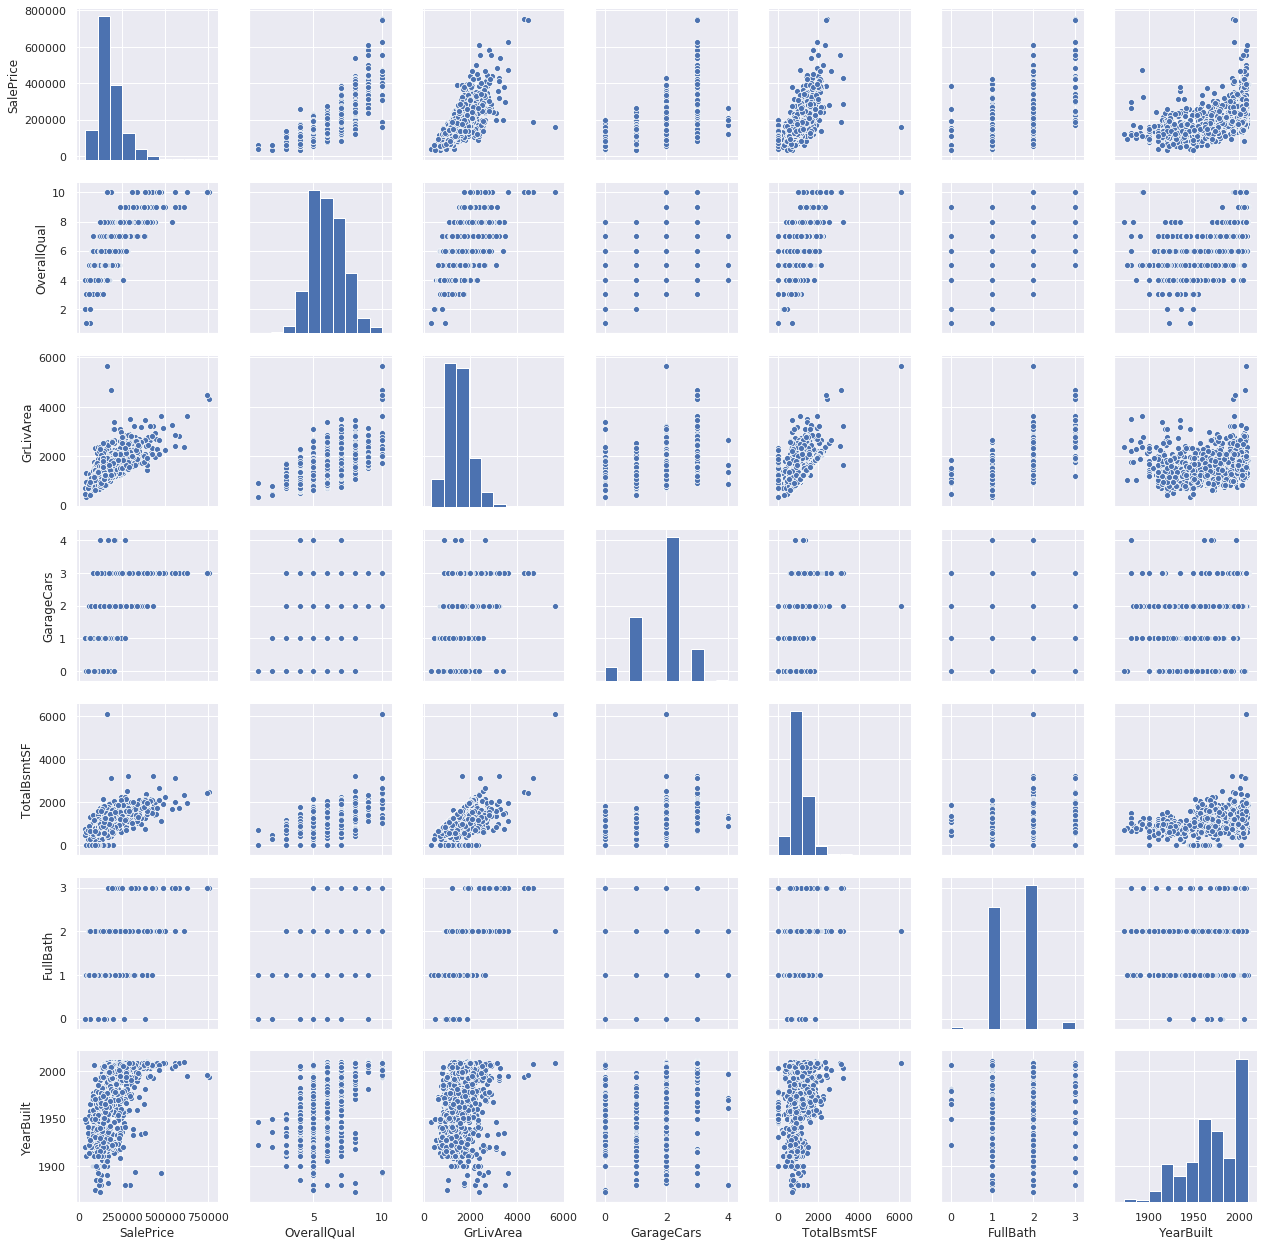

In [187]:
#scatterplot
sb.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

### Missing data

In [188]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


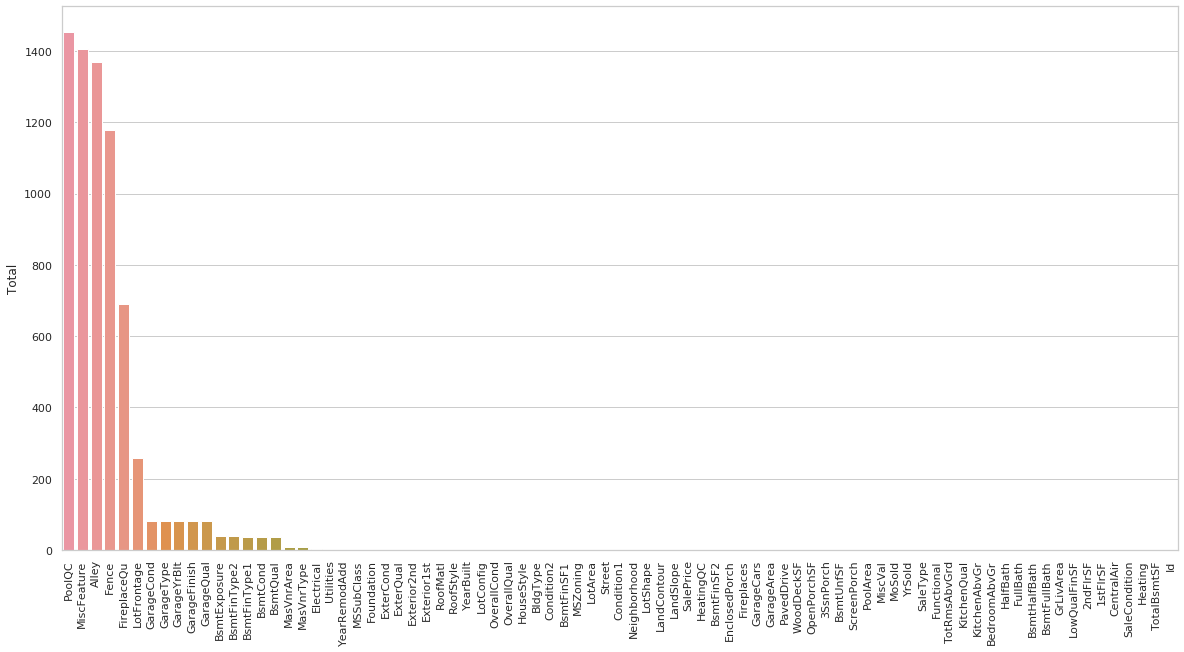

In [189]:
#plot the missing value count
sb.set(style="whitegrid", color_codes=True)
sb.barplot(x = missing_data.index, y = missing_data.Total, data=missing_data,errwidth = 3.2)
plt.xticks(rotation = 90)
plt.show()

In [190]:
#dealing with missing data
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max()

0

### Outliers

In [191]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


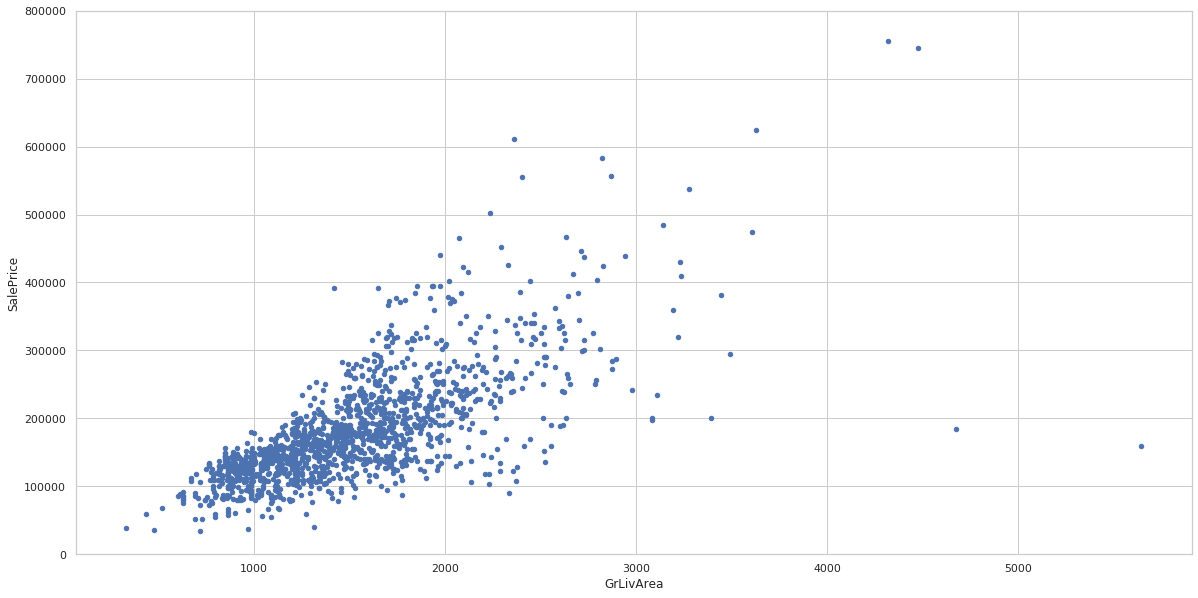

In [192]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [193]:
#deleting points
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


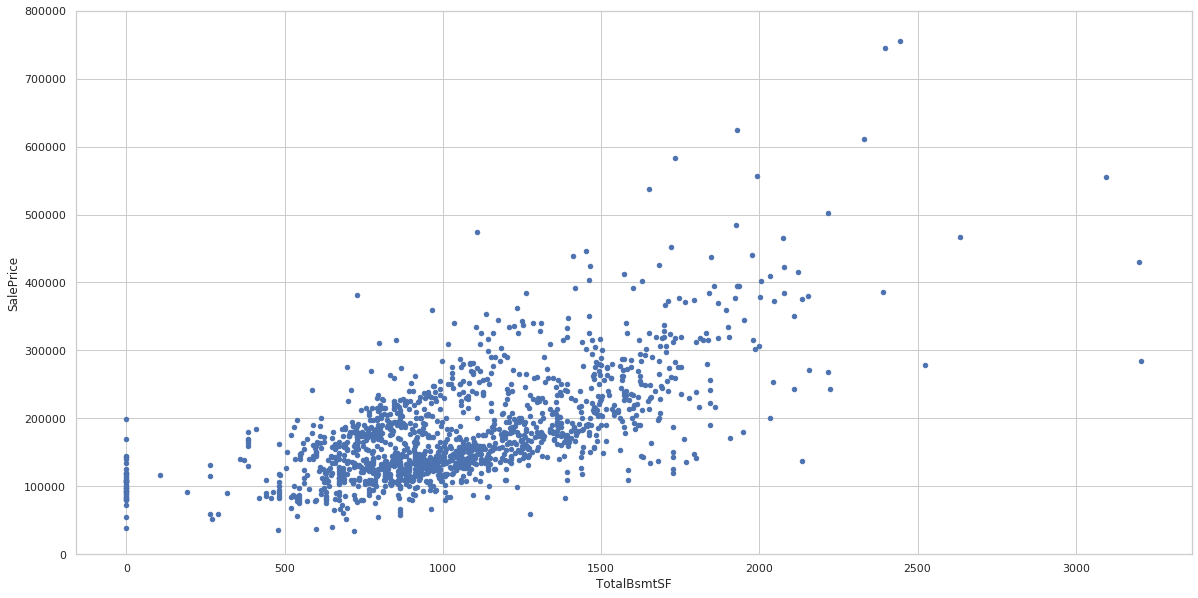

In [194]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

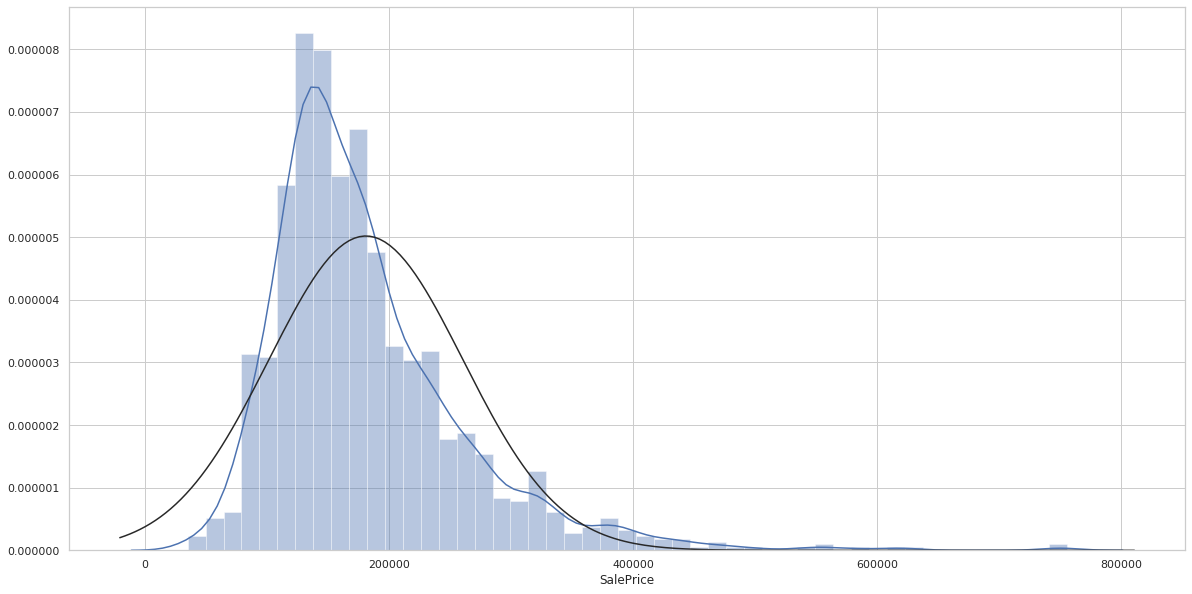

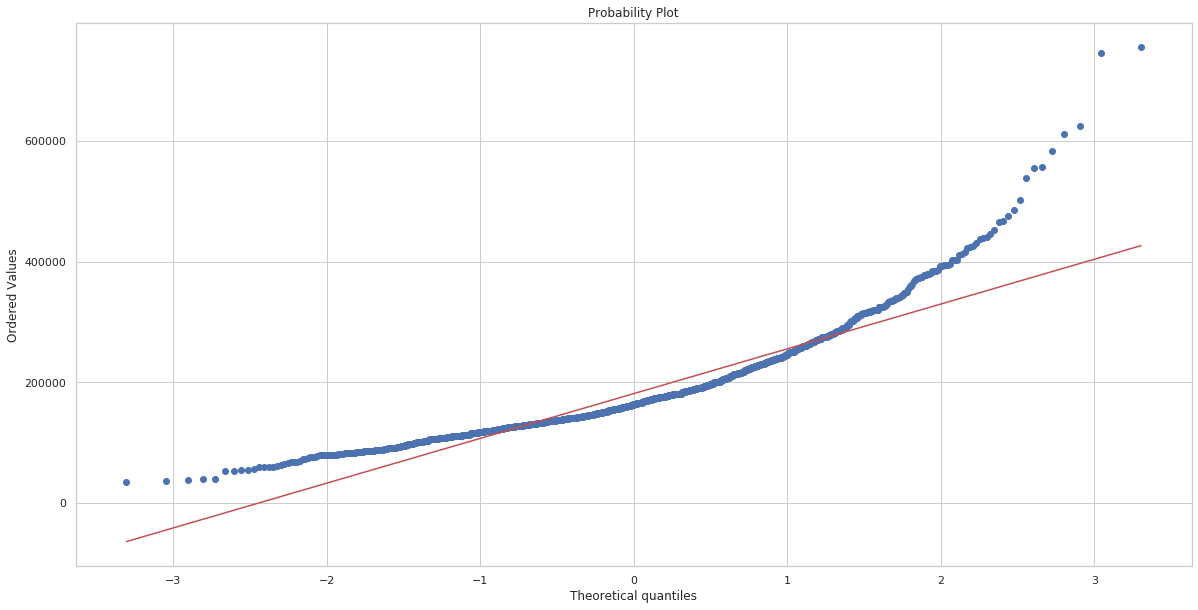

In [195]:
#histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [196]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])

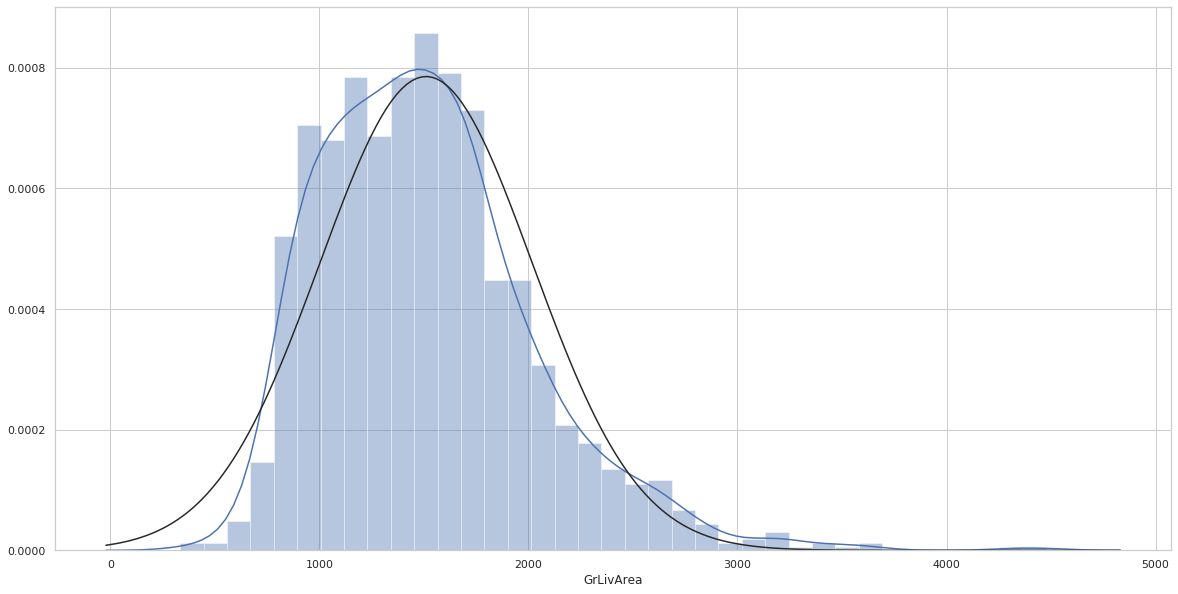

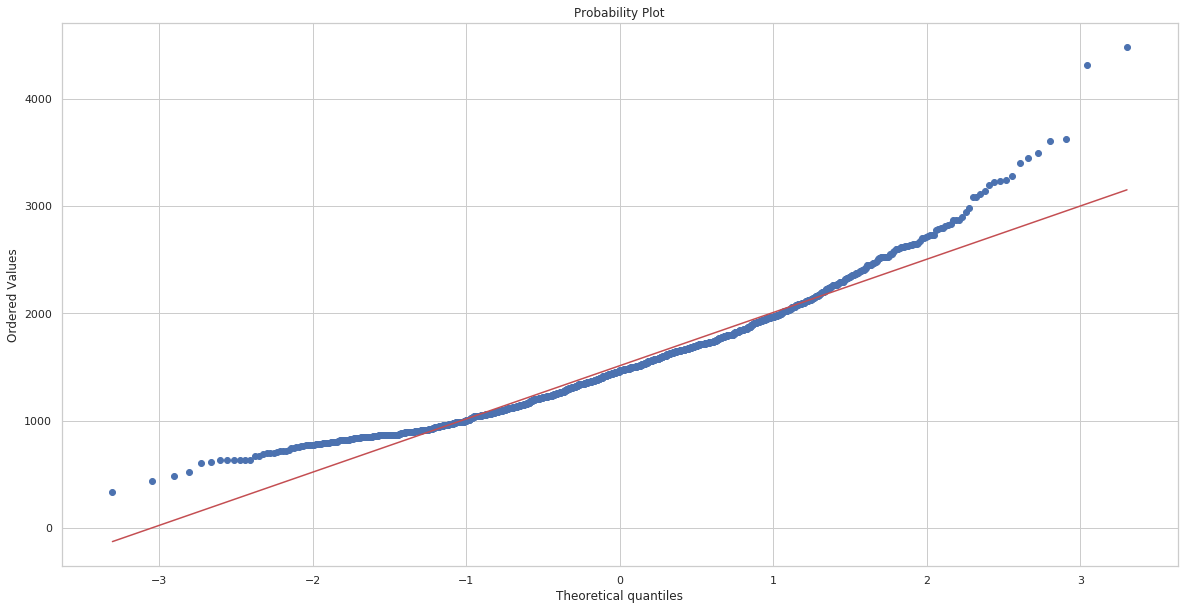

In [197]:
#histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

In [198]:
#data transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

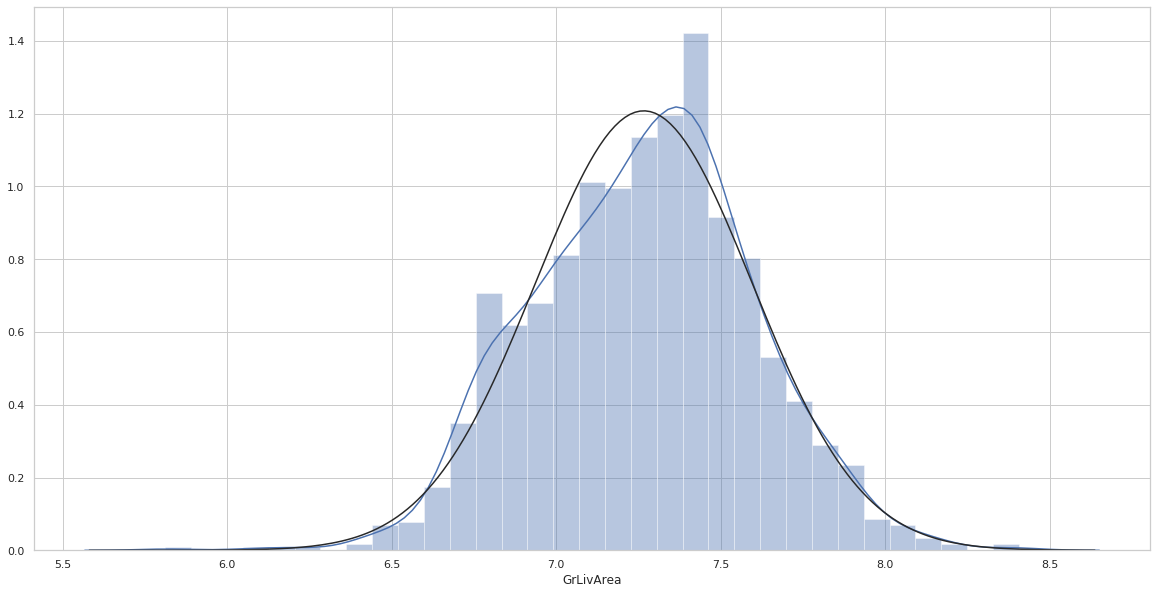

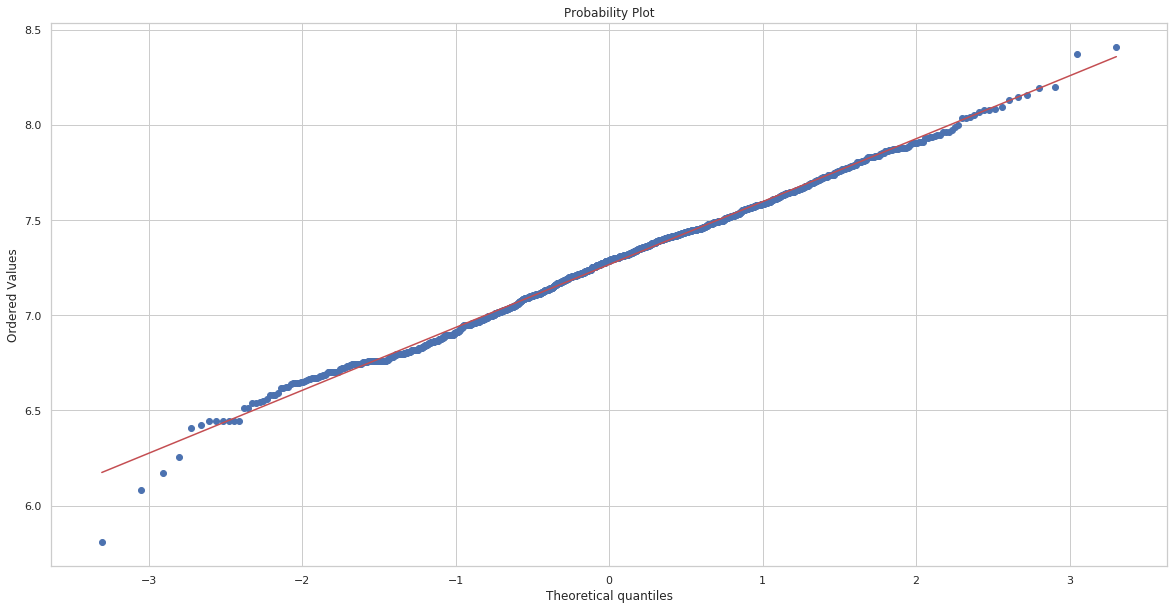

In [199]:
#transformed histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

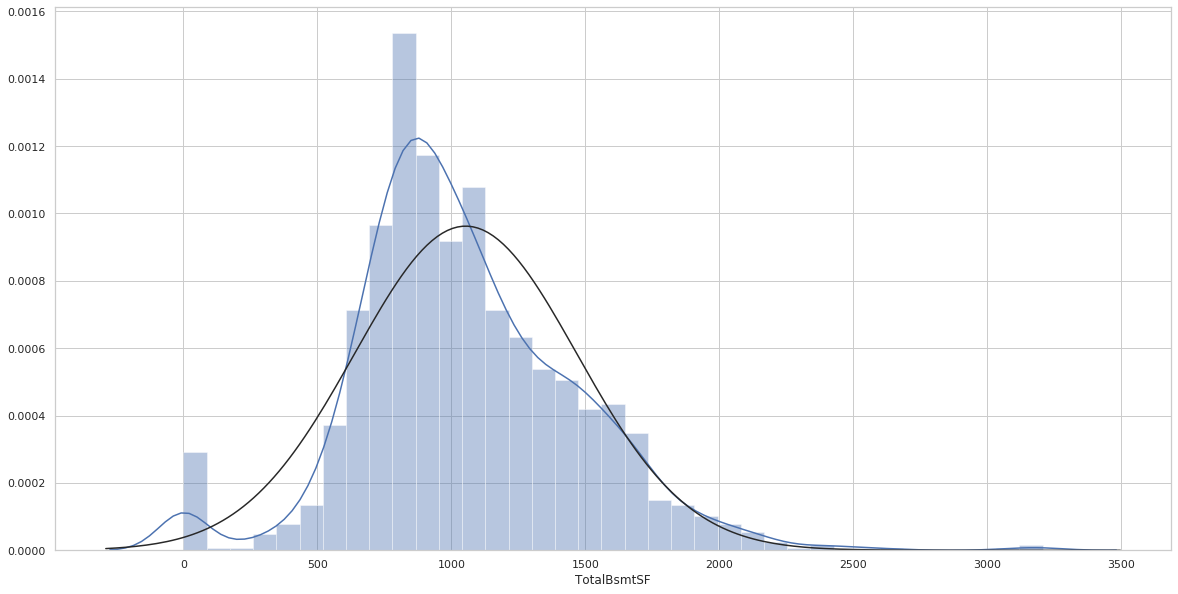

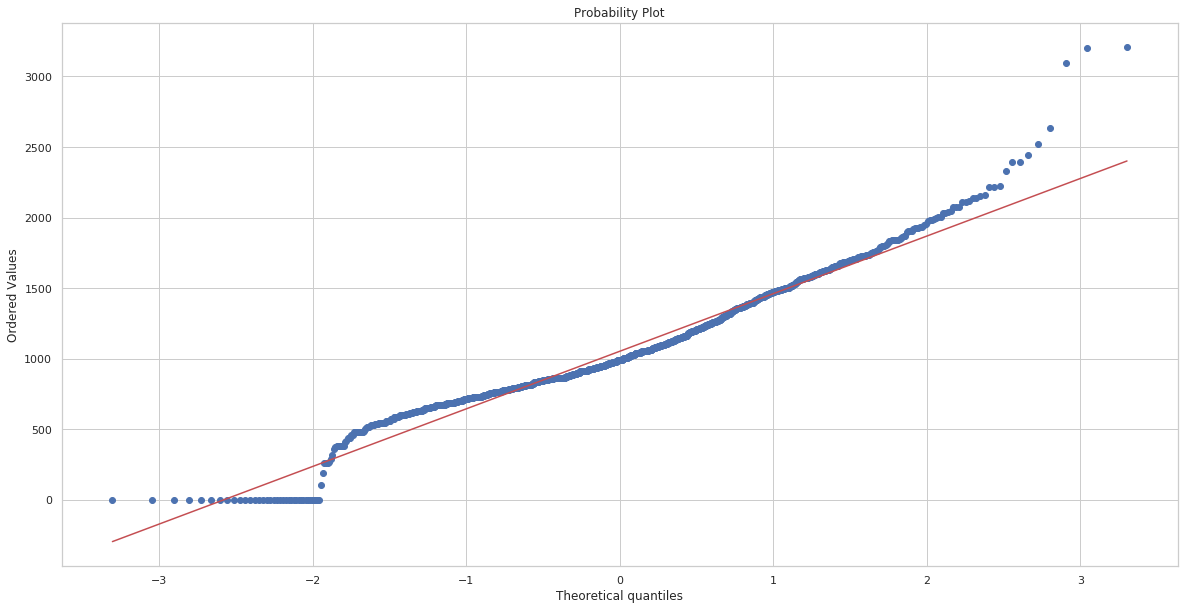

In [200]:
#histogram and normal probability plot
sns.distplot(train_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

In [201]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [202]:
#transform data
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

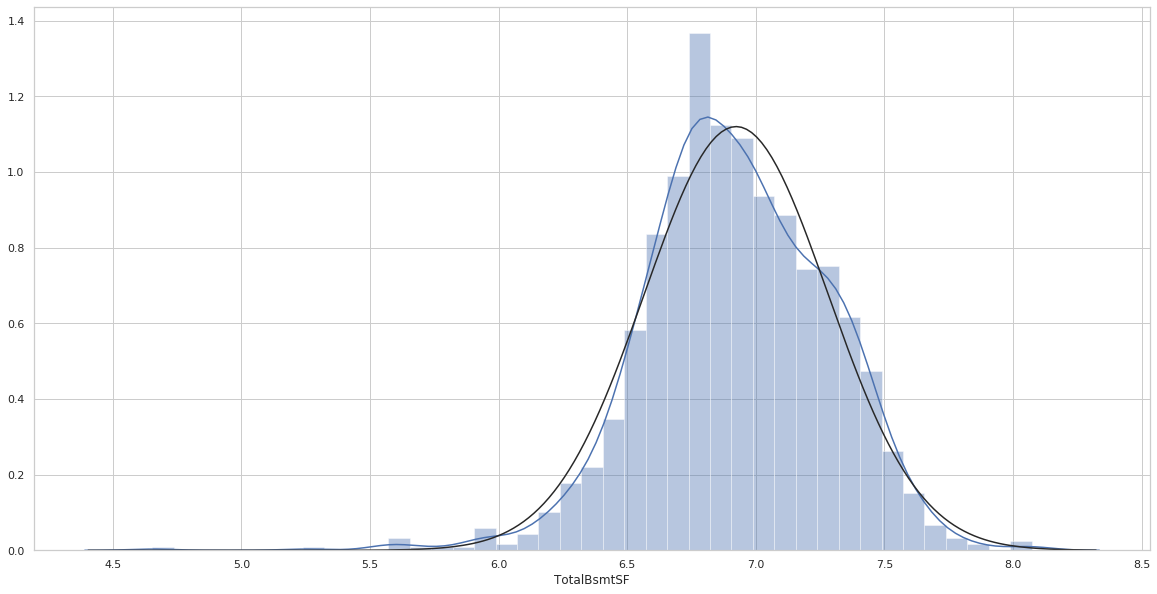

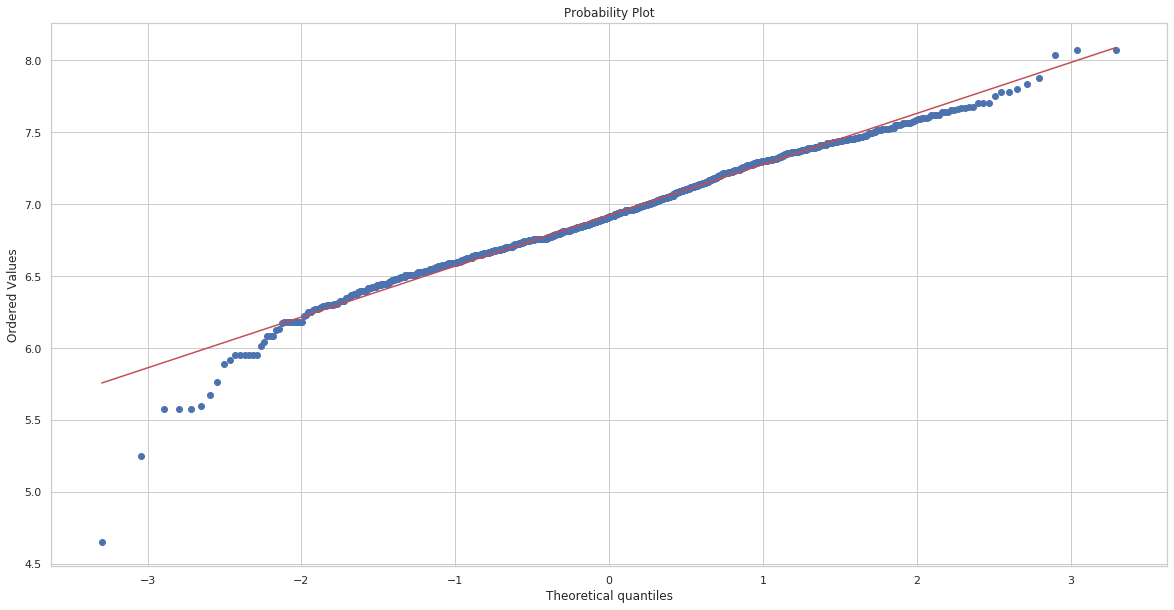

In [203]:
#histogram and normal probability plot
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

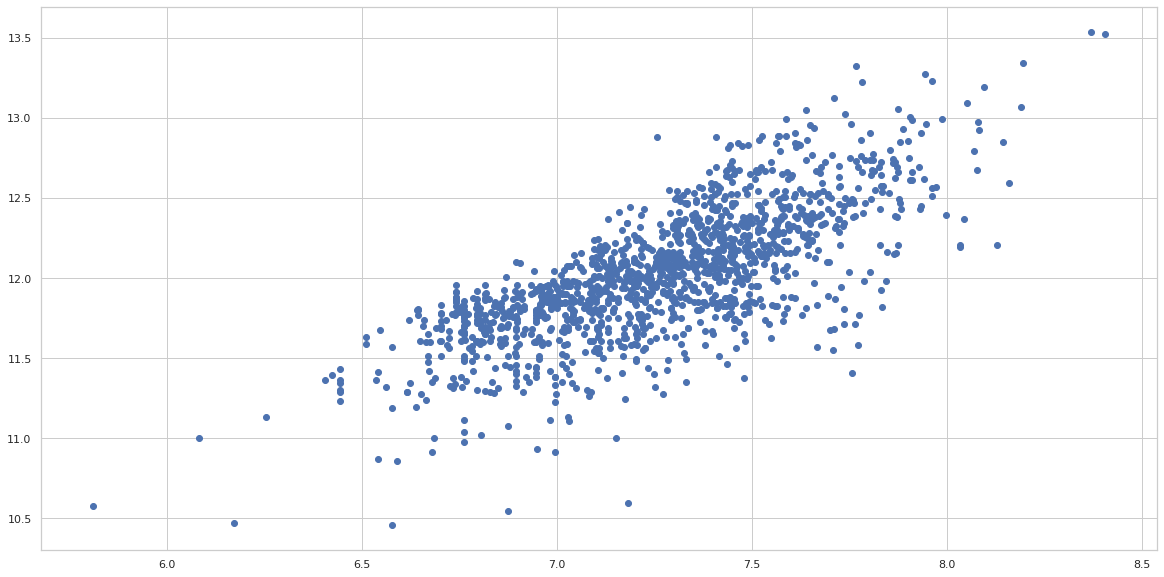

In [204]:
#scatter plot
plt.scatter(train_data['GrLivArea'], train_data['SalePrice']);

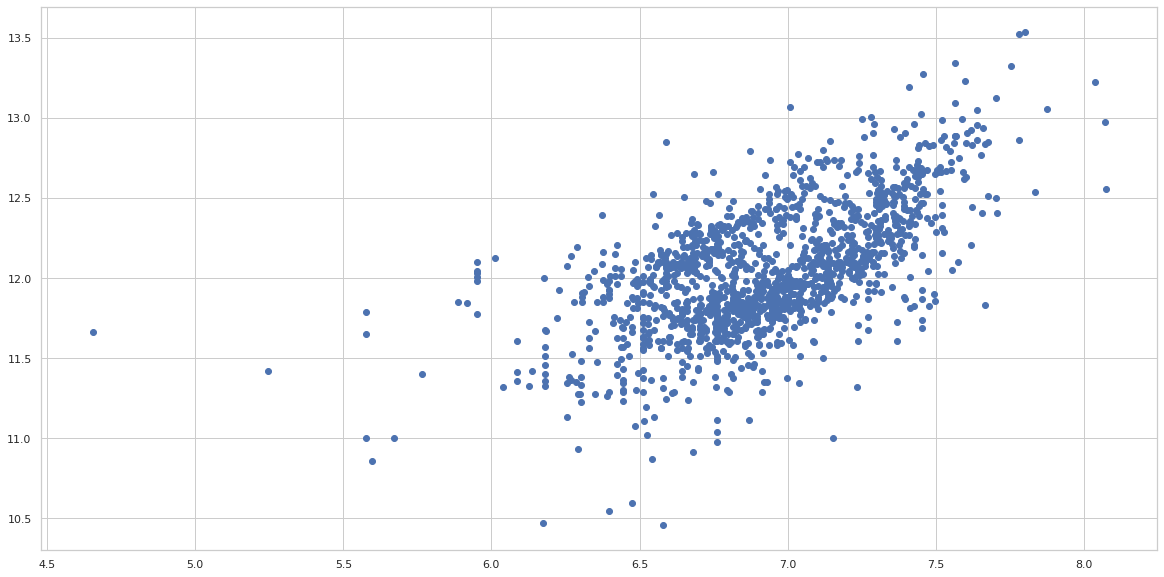

In [205]:
#scatter plot
plt.scatter(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], 
            train_data[train_data['TotalBsmtSF']>0]['SalePrice']);

In [206]:
#convert categorical variable into dummy
y_train = train.SalePrice.values
all_data = pd.get_dummies(train_data)

In [207]:
print(all_data.shape)
all_data.head()

(1457, 222)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [208]:
train = all_data
test = pd.read_csv('test.csv')

### Modelling

In [209]:
!pip install xgboost

In [210]:
!pip install lightgbm

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
# pull data into target (y) and predictors (X)
train_y = train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y);

In [172]:
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]
# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[11.83803833 12.02435373 11.96352351 ... 11.87105735 12.0403531
 12.41833629]
